In [1]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
#load data
df = pd.read_csv('stock.csv', infer_datetime_format=True, parse_dates=True, index_col=1, header=0, dayfirst=True)
df

,Ticker,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2023-02-07,AAPL,150.64,155.23,150.64,154.65,154.41,83322600.0
2023-02-08,AAPL,153.88,154.58,151.17,151.92,151.69,64120100.0
2023-02-09,AAPL,153.78,154.33,150.42,150.87,150.64,56007100.0
2023-02-10,AAPL,149.46,151.34,149.22,151.01,151.01,57450700.0
2023-02-13,AAPL,150.95,154.26,150.92,153.85,153.85,62199000.0
...,...,...,...,...,...,...,...
2023-05-01,GOOG,107.72,108.68,107.50,107.71,107.71,20926300.0
2023-05-02,GOOG,107.66,107.73,104.50,105.98,105.98,20343100.0
2023-05-03,GOOG,106.22,108.13,105.62,106.12,106.12,17116300.0


In [3]:
#Viewing what the dataset looks like
df

,Ticker,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2023-02-07,AAPL,150.64,155.23,150.64,154.65,154.41,83322600.0
2023-02-08,AAPL,153.88,154.58,151.17,151.92,151.69,64120100.0
2023-02-09,AAPL,153.78,154.33,150.42,150.87,150.64,56007100.0
2023-02-10,AAPL,149.46,151.34,149.22,151.01,151.01,57450700.0
2023-02-13,AAPL,150.95,154.26,150.92,153.85,153.85,62199000.0
...,...,...,...,...,...,...,...
2023-05-01,GOOG,107.72,108.68,107.50,107.71,107.71,20926300.0
2023-05-02,GOOG,107.66,107.73,104.50,105.98,105.98,20343100.0
2023-05-03,GOOG,106.22,108.13,105.62,106.12,106.12,17116300.0


In [4]:
#check datatypes
df.dtypes

Ticker        object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [5]:
#Check the columns and the number of rows as well as their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2023-02-07 to 2023-05-05
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Open       248 non-null    float64
 2   High       248 non-null    float64
 3   Low        248 non-null    float64
 4   Close      248 non-null    float64
 5   Adj Close  248 non-null    float64
 6   Volume     248 non-null    float64
dtypes: float64(6), object(1)
memory usage: 15.5+ KB


In [6]:
#Gives a descriptive statistics about the data
round(df.describe(), 1)

,Open,High,Low,Close,Adj Close,Volume
count,248.0,248.0,248.0,248.0,248.0,248.0
mean,215.3,217.9,212.7,215.4,215.4,32082104.0
std,91.7,92.9,90.1,91.5,91.5,22335898.6
min,89.5,90.1,88.9,89.4,89.4,2657900.0
25%,135.2,137.4,134.8,136.3,136.3,17141800.0
50%,208.8,212.6,208.2,209.9,209.9,27340000.0
75%,304.2,307.6,295.4,303.9,303.9,47717725.0
max,372.4,373.8,361.7,366.8,366.8,113316400.0


In [7]:
#Looking for null values
df.isnull().sum()

Ticker       0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
#identifying unique values
df.nunique()

Ticker         4
Open         244
High         248
Low          247
Close        244
Adj Close    244
Volume       248
dtype: int64

In [9]:
#checking for the number of rows and columns
df.shape

(248, 7)

In [10]:
#Looking at how correlated the columns in the whole dataset are
round(df.corr(), 1)

,Open,High,Low,Close,Adj Close,Volume
Open,1.0,1.0,1.0,1.0,1.0,-0.5
High,1.0,1.0,1.0,1.0,1.0,-0.5
Low,1.0,1.0,1.0,1.0,1.0,-0.5
Close,1.0,1.0,1.0,1.0,1.0,-0.5
Adj Close,1.0,1.0,1.0,1.0,1.0,-0.5
Volume,-0.5,-0.5,-0.5,-0.5,-0.5,1.0


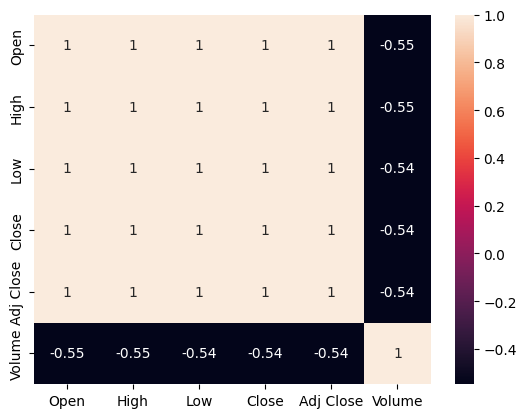

In [11]:
#plotting a heatmap for the correlations above 
sns.heatmap(df.corr(), annot=True)
plt.rcParams['figure.figsize']=(9, 7)
plt.show()

In [12]:
#creating a separate dataframe for AAPL stocks to work on
AAPL = df.query('Ticker == "AAPL"')
AAPL

,Ticker,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2023-02-07,AAPL,150.64,155.23,150.64,154.65,154.41,83322600.0
2023-02-08,AAPL,153.88,154.58,151.17,151.92,151.69,64120100.0
2023-02-09,AAPL,153.78,154.33,150.42,150.87,150.64,56007100.0
2023-02-10,AAPL,149.46,151.34,149.22,151.01,151.01,57450700.0
2023-02-13,AAPL,150.95,154.26,150.92,153.85,153.85,62199000.0
...,...,...,...,...,...,...,...
2023-05-01,AAPL,169.28,170.45,168.64,169.59,169.59,52472900.0
2023-05-02,AAPL,170.09,170.35,167.54,168.54,168.54,48425700.0
2023-05-03,AAPL,169.50,170.92,167.16,167.45,167.45,65136000.0


In [13]:
#Viewing information about AAPL dataframe
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62 entries, 2023-02-07 to 2023-05-05
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     62 non-null     object 
 1   Open       62 non-null     float64
 2   High       62 non-null     float64
 3   Low        62 non-null     float64
 4   Close      62 non-null     float64
 5   Adj Close  62 non-null     float64
 6   Volume     62 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.9+ KB


In [14]:
#Getting descriptive statistics 
round(AAPL.describe(), 1)

,Open,High,Low,Close,Adj Close,Volume
count,62.0,62.0,62.0,62.0,62.0,62.0
mean,157.8,159.5,156.7,158.2,158.2,60282958.1
std,7.2,7.2,7.3,7.4,7.4,14306052.7
min,144.4,146.7,143.9,145.3,145.3,41516200.0
25%,151.5,153.5,150.5,152.1,151.9,49607025.0
50%,158.4,159.9,157.1,158.1,158.1,56094550.0
75%,164.7,165.8,163.8,165.2,165.2,68376175.0
max,171.0,174.3,170.8,173.6,173.6,113316400.0


In [15]:
#Dropping the volume column to make plotting the other values easier because it it way too big
AAPL_without_volume = AAPL.drop('Volume', axis=1)

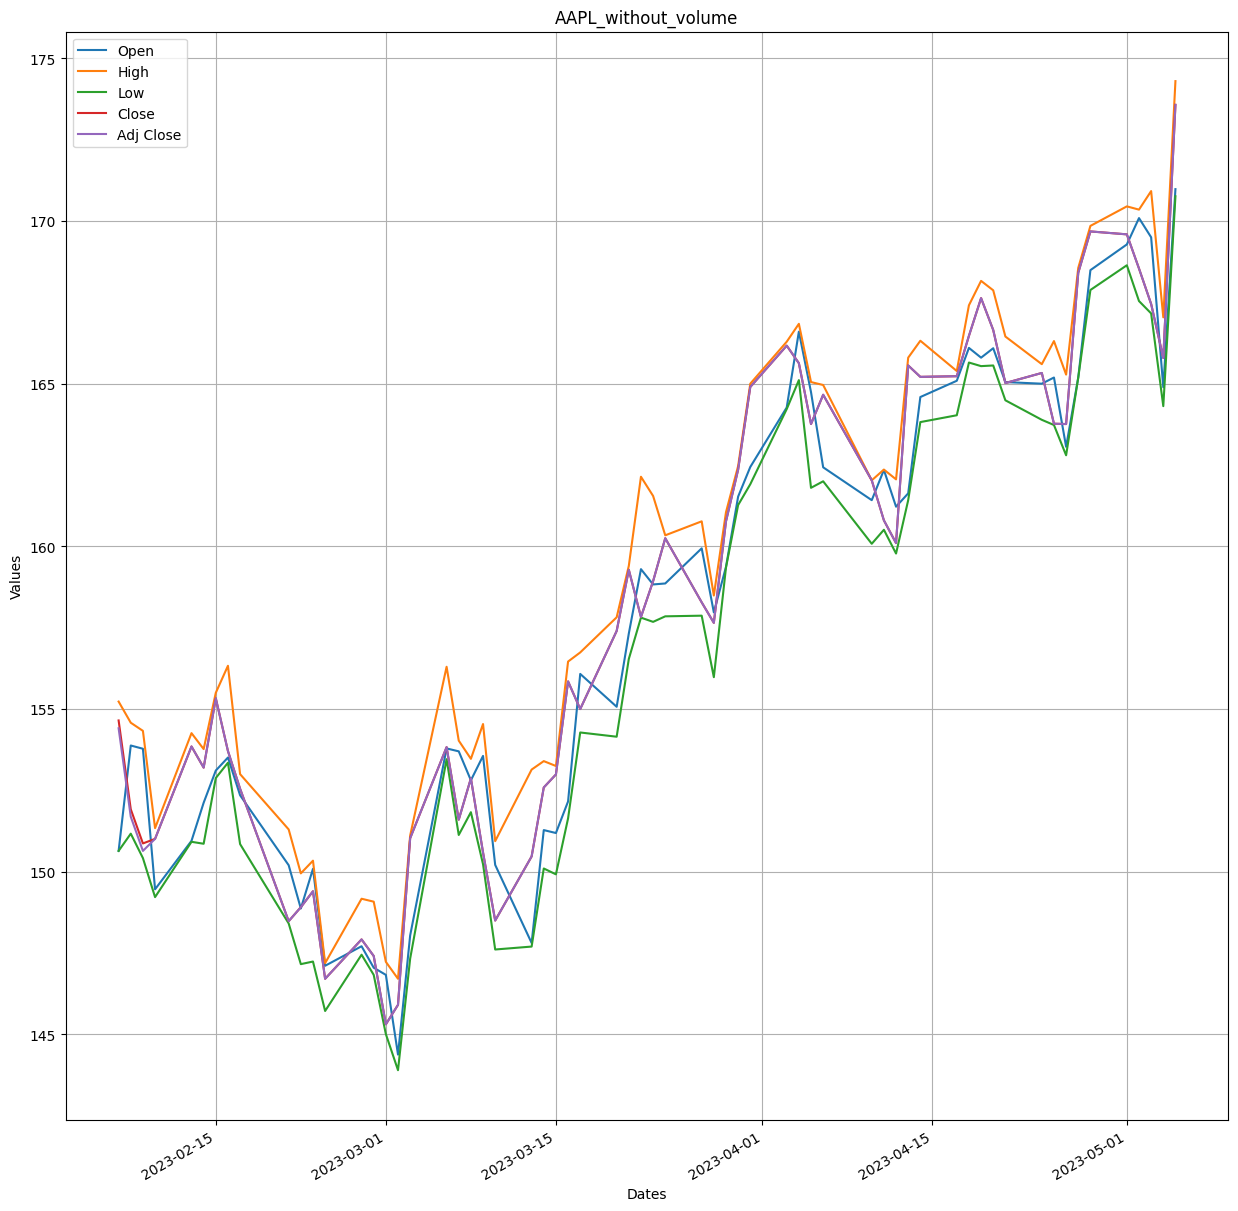

In [16]:
#Plotting a line graph
AAPL_without_volume.plot(figsize=(15, 16))
plt.xlabel('Dates')
plt.ylabel('Values')
plt.title('AAPL_without_volume')
plt.grid()

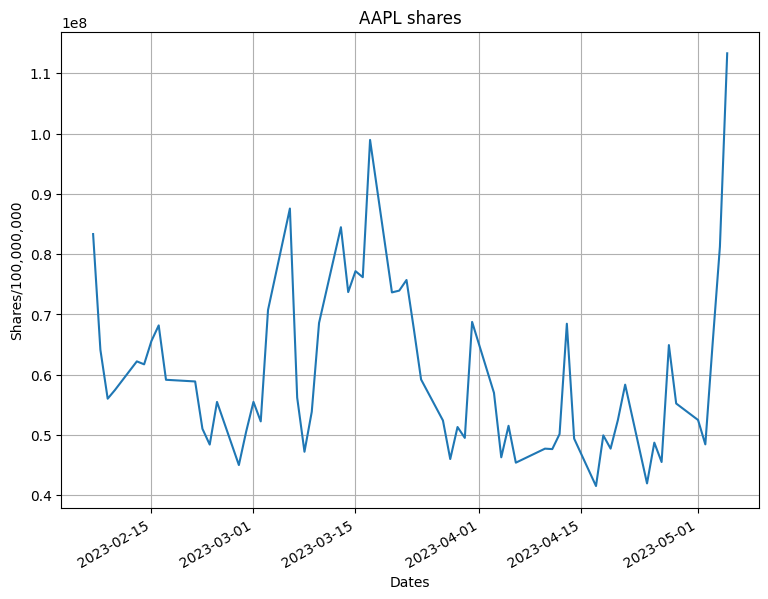

In [41]:
#Visualizing the Volume column in the APPL dataframe
AAPL['Volume'].plot()
plt.xlabel('Dates')
plt.ylabel('Shares/100,000,000')
plt.title('AAPL shares')
plt.grid()

<Axes: title={'center': 'AAPL Boxplot'}, ylabel='Price'>

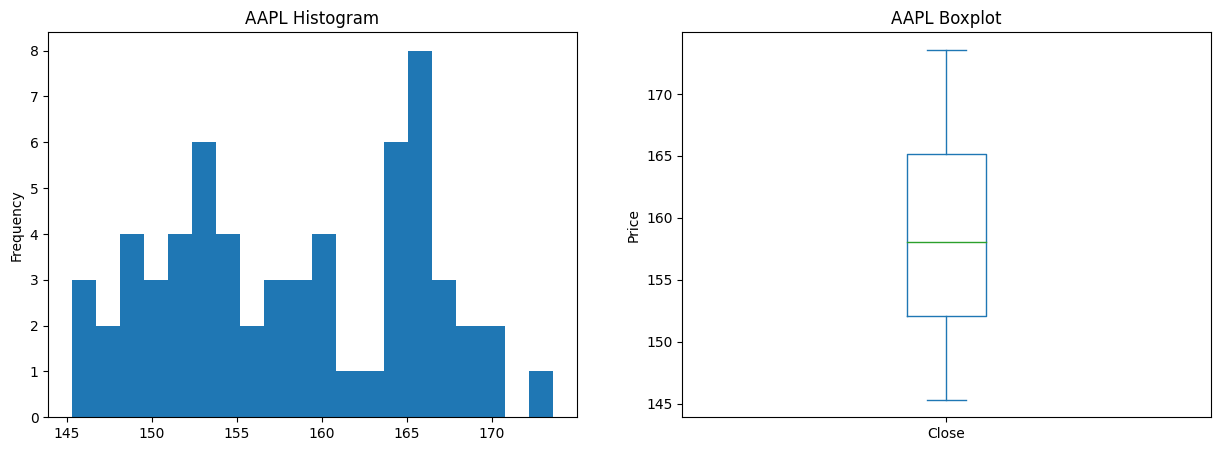

In [18]:
#showing the disribution of data 
fig, axs = plt.subplots(nrows =1 , ncols =2 , figsize = (15,5))

# AAPL Histogram
AAPL['Close'].plot(kind = 'hist', bins = 20, ax = axs[0], title = 'AAPL Histogram')

# AAPL Boxplot 
AAPL['Close'].plot(kind = 'box', ax = axs[1], title = 'AAPL Boxplot',ylabel = 'Price', vert = True)

In [19]:
#creating a separate MSFT stock data 
MSFT = df.query('Ticker == "MSFT"')
MSFT

,Ticker,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2023-02-07,MSFT,260.53,268.77,260.08,267.56,266.89,50841400.0
2023-02-08,MSFT,273.20,276.76,266.21,266.73,266.06,54686000.0
2023-02-09,MSFT,273.80,273.98,262.80,263.62,262.96,42375100.0
2023-02-10,MSFT,261.53,264.09,260.66,263.10,262.44,25818500.0
2023-02-13,MSFT,267.64,274.60,267.15,271.32,270.64,44630900.0
...,...,...,...,...,...,...,...
2023-05-01,MSFT,306.97,308.60,305.15,305.56,305.56,21294100.0
2023-05-02,MSFT,307.76,309.18,303.91,305.41,305.41,26404400.0
2023-05-03,MSFT,306.62,308.61,304.09,304.40,304.40,22360800.0


In [20]:
##Viewing information about MSFT dataframe
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62 entries, 2023-02-07 to 2023-05-05
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     62 non-null     object 
 1   Open       62 non-null     float64
 2   High       62 non-null     float64
 3   Low        62 non-null     float64
 4   Close      62 non-null     float64
 5   Adj Close  62 non-null     float64
 6   Volume     62 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.9+ KB


In [21]:
#Getting descriptive statistics 
round(MSFT.describe(), 1)

,Open,High,Low,Close,Adj Close,Volume
count,62.0,62.0,62.0,62.0,62.0,62.0
mean,274.7,277.8,272.0,275.0,275.0,30848353.2
std,17.3,17.4,17.4,17.7,17.7,11091882.0
min,246.6,250.9,245.6,246.3,246.3,17150300.0
25%,257.4,260.4,256.0,258.7,258.7,23392350.0
50%,277.1,280.8,273.7,275.8,275.8,27340000.0
75%,285.8,289.0,283.6,287.2,287.2,34324100.0
max,307.8,312.0,305.2,310.6,310.6,69527400.0


In [22]:
#Isolating the data excuding column 'Volume' into a separate dataframe
MSFT_without_volume = MSFT.drop('Volume', axis=1)

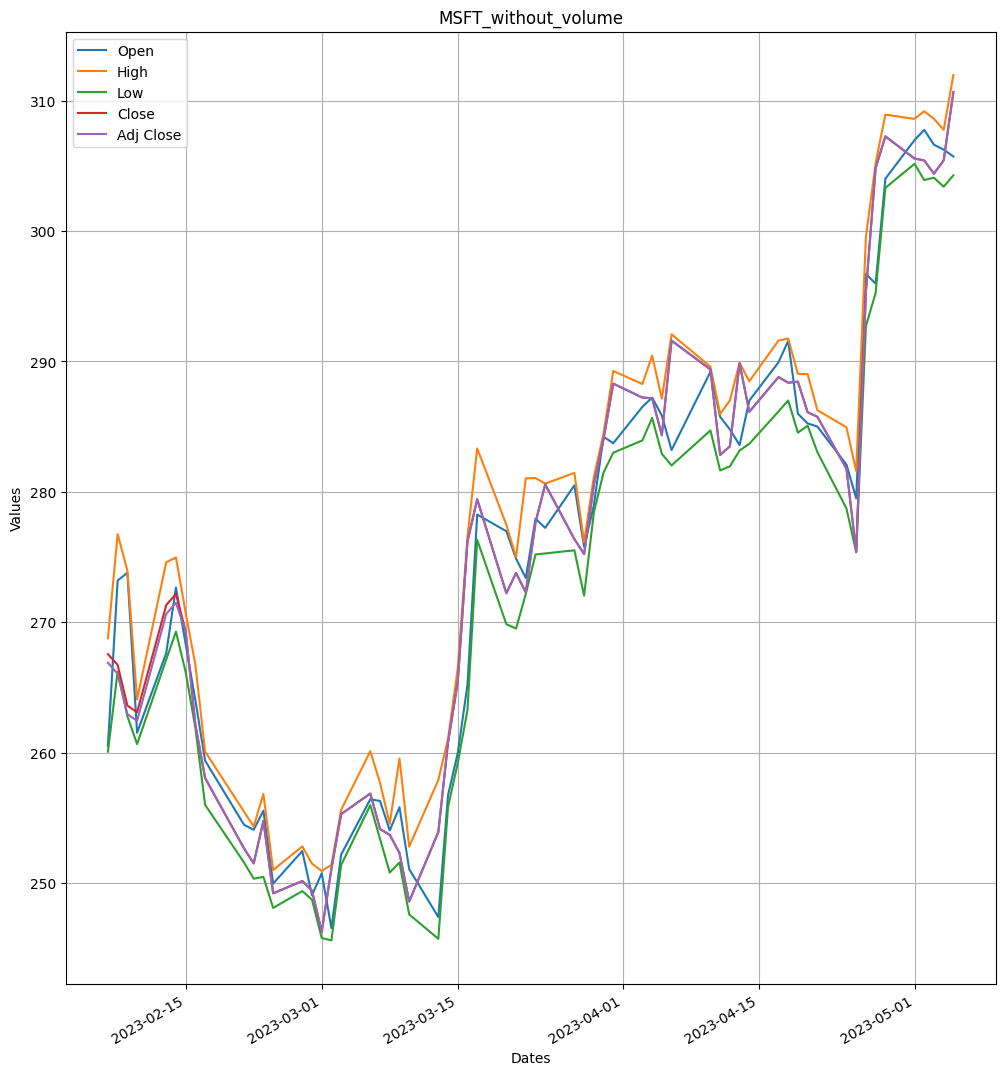

In [23]:
MSFT_without_volume.plot(figsize=(12, 13))
plt.xlabel('Dates')
plt.ylabel('Values')
plt.title('MSFT_without_volume')
plt.grid()

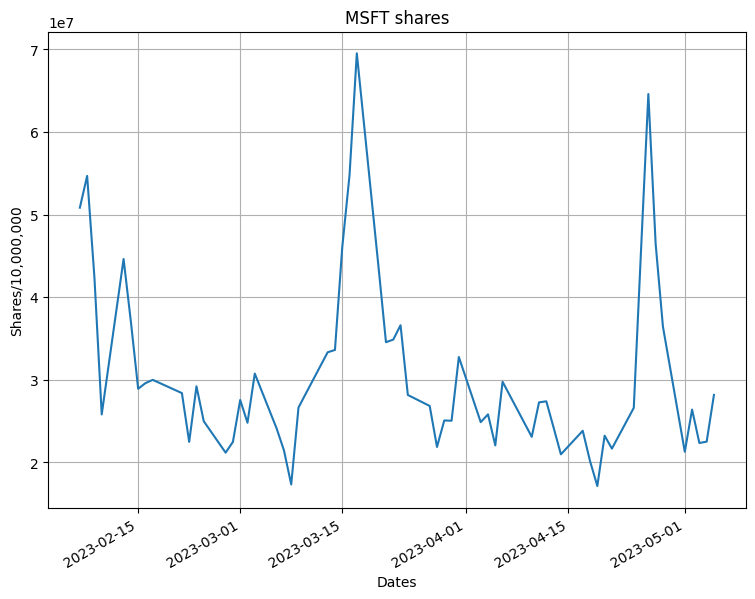

In [40]:
#Viewing the Volume column IN MSFT dataframe
MSFT['Volume'].plot()
plt.xlabel('Dates')
plt.ylabel('Shares/10,000,000')
plt.title('MSFT shares')
plt.grid()

<Axes: title={'center': 'MSFT Boxplot'}, ylabel='Price'>

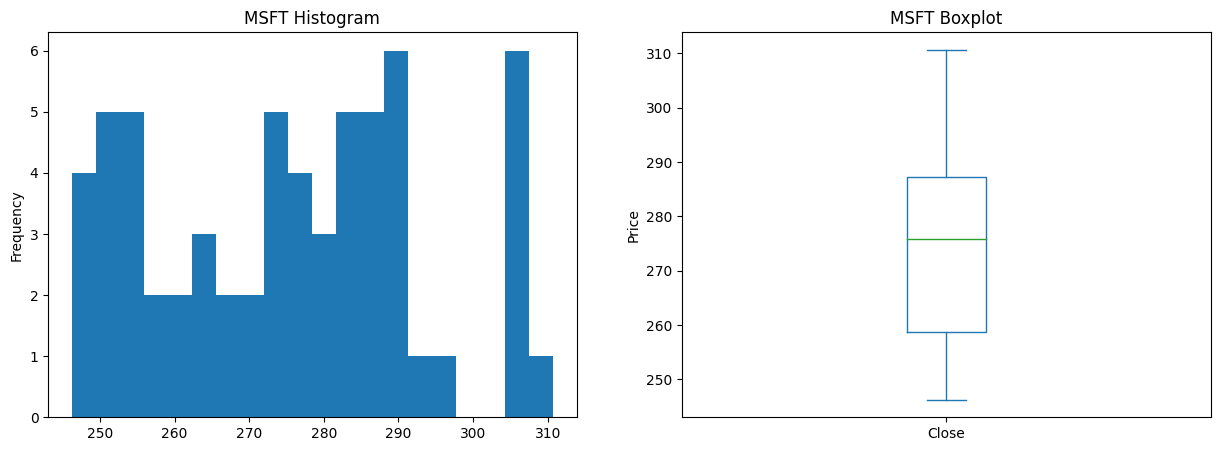

In [25]:
#showing the disribution of data through  histogram and a boxplot
fig, axs = plt.subplots(nrows =1 , ncols =2 , figsize = (15,5))

# MSFT Histogram
MSFT['Close'].plot(kind = 'hist', bins = 20, ax = axs[0], title = 'MSFT Histogram')

# MSFT Boxplot 
MSFT['Close'].plot(kind = 'box', ax = axs[1], title = 'MSFT Boxplot',ylabel = 'Price', vert = True)

In [26]:
#creating a separate NFLX stock data 
NFLX = df.query('Ticker == "NFLX"')
NFLX

,Ticker,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2023-02-07,NFLX,358.51,364.18,354.18,362.95,362.95,6289400.0
2023-02-08,NFLX,360.02,368.19,358.31,366.83,366.83,6253200.0
2023-02-09,NFLX,372.41,373.83,361.74,362.50,362.50,6901100.0
2023-02-10,NFLX,359.16,362.14,347.14,347.36,347.36,7291100.0
2023-02-13,NFLX,349.50,359.70,344.25,358.57,358.57,7134400.0
...,...,...,...,...,...,...,...
2023-05-01,NFLX,329.44,331.23,318.09,324.12,324.12,5341500.0
2023-05-02,NFLX,325.00,326.07,315.62,317.55,317.55,4318600.0
2023-05-03,NFLX,317.55,324.62,315.85,319.30,319.30,5064100.0


In [27]:
##Viewing information about NFLX dataframe
NFLX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62 entries, 2023-02-07 to 2023-05-05
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     62 non-null     object 
 1   Open       62 non-null     float64
 2   High       62 non-null     float64
 3   Low        62 non-null     float64
 4   Close      62 non-null     float64
 5   Adj Close  62 non-null     float64
 6   Volume     62 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.9+ KB


In [28]:
#Getting descriptive statistics 
round(NFLX.describe(), 1)

,Open,High,Low,Close,Adj Close,Volume
count,62.0,62.0,62.0,62.0,62.0,62.0
mean,328.1,332.6,322.8,327.6,327.6,6471732.3
std,18.5,18.1,18.4,18.6,18.6,3416398.1
min,287.3,297.4,285.3,292.8,292.8,2657900.0
25%,317.1,322.9,312.0,315.7,315.7,4623600.0
50%,325.6,331.3,321.1,325.6,325.6,5639750.0
75%,340.7,344.7,336.4,338.9,338.9,6883500.0
max,372.4,373.8,361.7,366.8,366.8,22128300.0


In [29]:
#Isolating the data excuding column 'Volume' into a separate dataframe
NFLX_without_volume = NFLX.drop('Volume', axis=1)

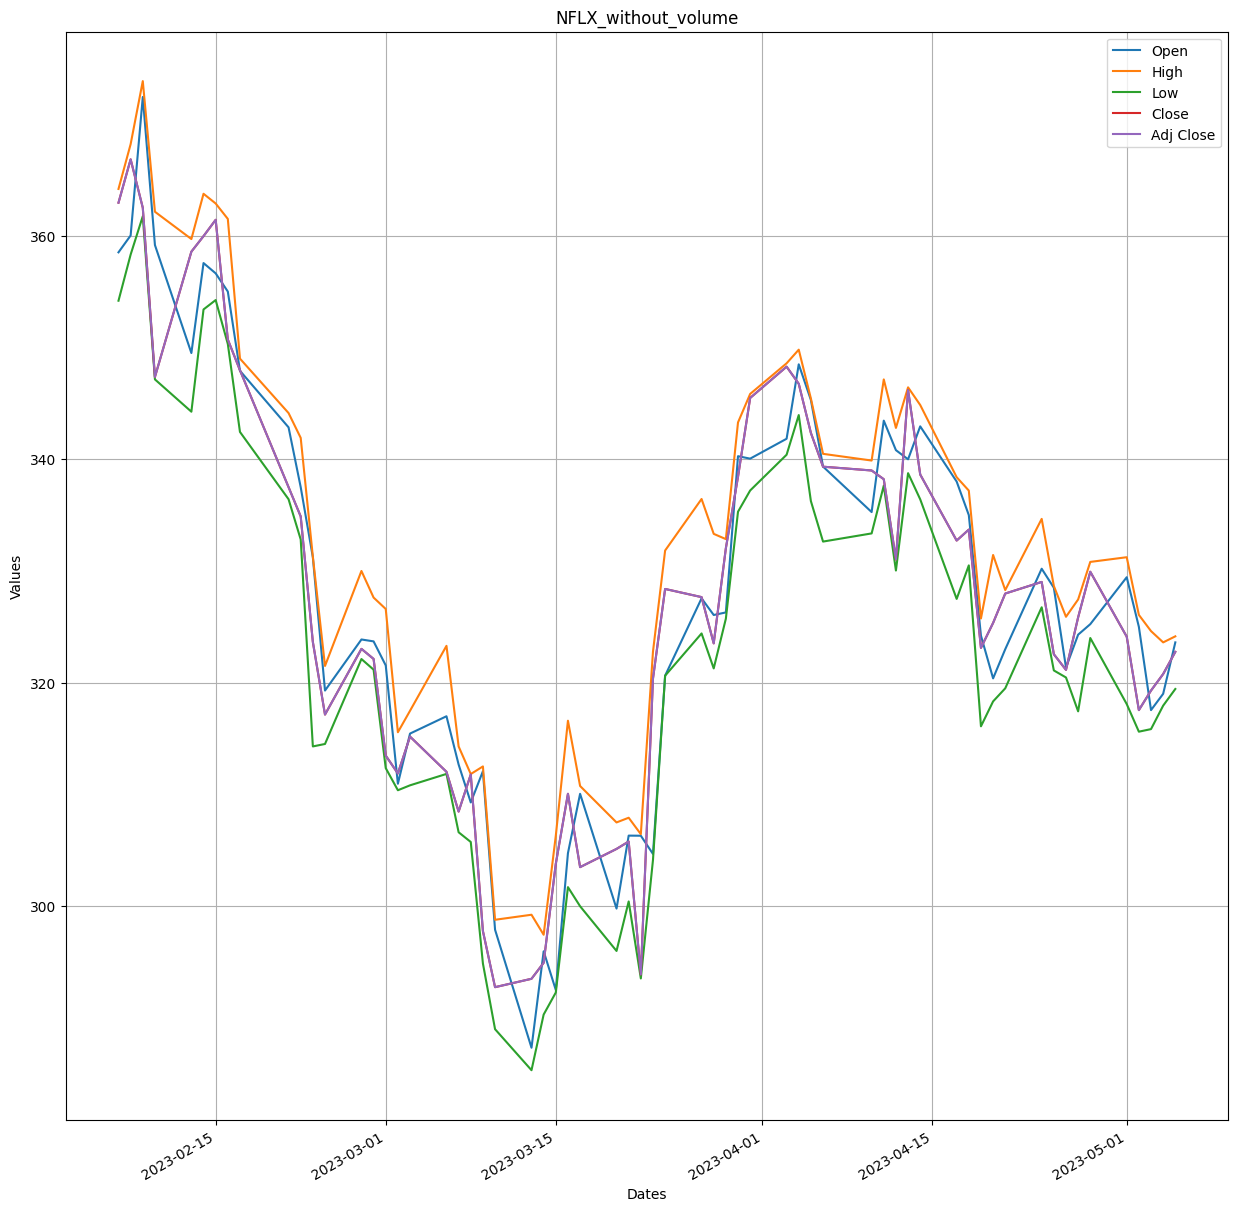

In [30]:
NFLX_without_volume.plot(figsize=(15, 16))
plt.xlabel('Dates')
plt.ylabel('Values')
plt.title('NFLX_without_volume')
plt.grid()

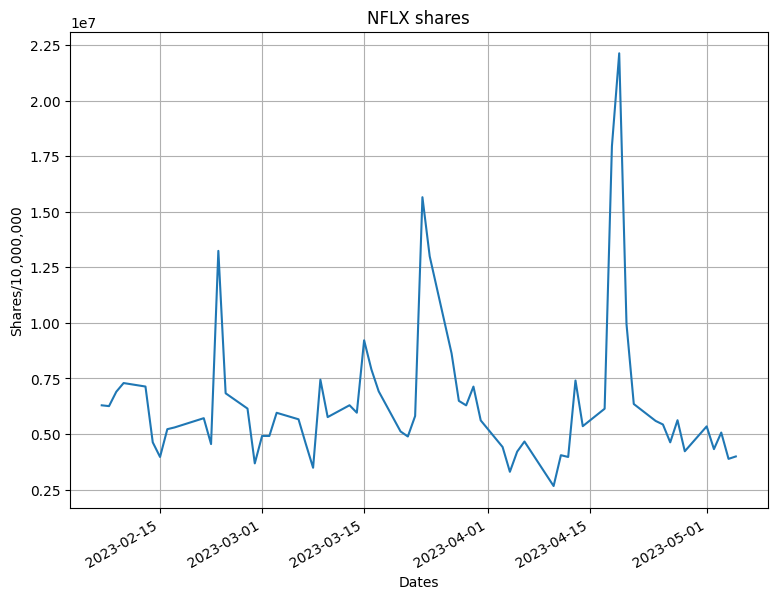

In [42]:
#Viewing the Volume column IN NFLX dataframe
NFLX['Volume'].plot()
plt.xlabel('Dates')
plt.ylabel('Shares/10,000,000')
plt.title('NFLX shares')
plt.grid()

<Axes: title={'center': 'NFLX Boxplot'}, ylabel='Price'>

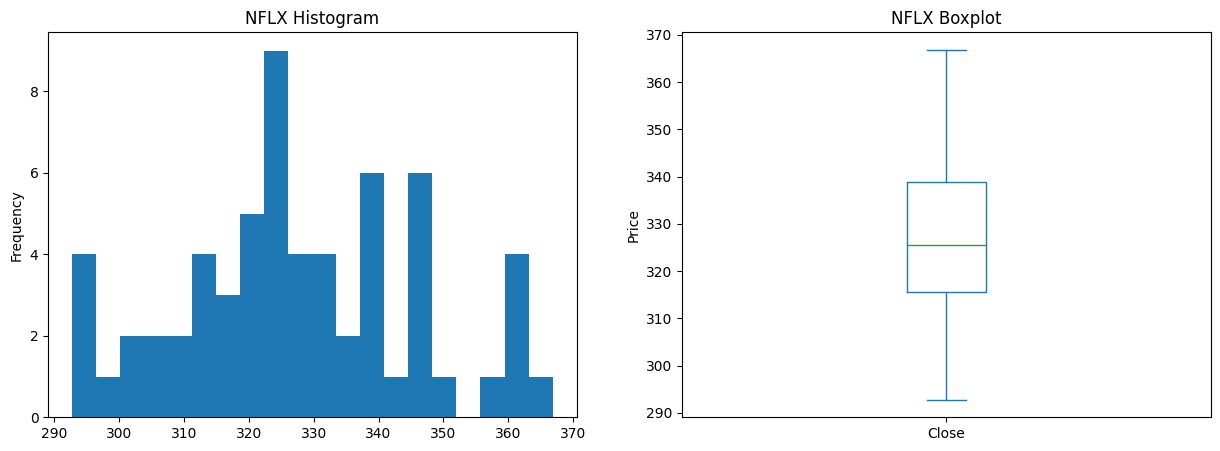

In [32]:
#showing the disribution of data through  histogram and a boxplot
fig, axs = plt.subplots(nrows =1 , ncols =2 , figsize = (15,5))

# NFLX Histogram
NFLX['Close'].plot(kind = 'hist', bins = 20, ax = axs[0], title = 'NFLX Histogram')

# NFLX Boxplot 
NFLX['Close'].plot(kind = 'box', ax = axs[1], title = 'NFLX Boxplot',ylabel = 'Price', vert = True)

In [33]:
#creating a separate GOOG stock data 
GOOG = df.query('Ticker == "GOOG"')
GOOG

,Ticker,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2023-02-07,GOOG,103.63,108.67,103.55,108.04,108.04,33738800.0
2023-02-08,GOOG,102.69,103.58,98.46,100.00,100.00,73546000.0
2023-02-09,GOOG,100.54,100.61,93.86,95.46,95.46,97798600.0
2023-02-10,GOOG,95.74,97.02,94.53,94.86,94.86,49325300.0
2023-02-13,GOOG,95.01,95.35,94.05,95.00,95.00,43116600.0
...,...,...,...,...,...,...,...
2023-05-01,GOOG,107.72,108.68,107.50,107.71,107.71,20926300.0
2023-05-02,GOOG,107.66,107.73,104.50,105.98,105.98,20343100.0
2023-05-03,GOOG,106.22,108.13,105.62,106.12,106.12,17116300.0


In [34]:
##Viewing information about NFLX dataframe
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62 entries, 2023-02-07 to 2023-05-05
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     62 non-null     object 
 1   Open       62 non-null     float64
 2   High       62 non-null     float64
 3   Low        62 non-null     float64
 4   Close      62 non-null     float64
 5   Adj Close  62 non-null     float64
 6   Volume     62 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.9+ KB


In [35]:
#Getting descriptive statistics 
round(GOOG.describe(), 1)

,Open,High,Low,Close,Adj Close,Volume
count,62.0,62.0,62.0,62.0,62.0,62.0
mean,100.4,101.8,99.3,100.6,100.6,30725372.6
std,6.2,6.2,6.1,6.3,6.3,14225092.9
min,89.5,90.1,88.9,89.4,89.4,16732000.0
25%,94.5,96.0,93.5,94.7,94.7,22406175.0
50%,102.7,103.9,101.2,102.8,102.8,27205200.0
75%,105.9,107.1,104.7,106.0,106.0,32743500.0
max,107.8,109.6,107.6,109.5,109.5,97798600.0


In [36]:
#Isolating the data excuding column 'Volume' into a separate dataframe
GOOG_without_volume = NFLX.drop('Volume', axis=1)

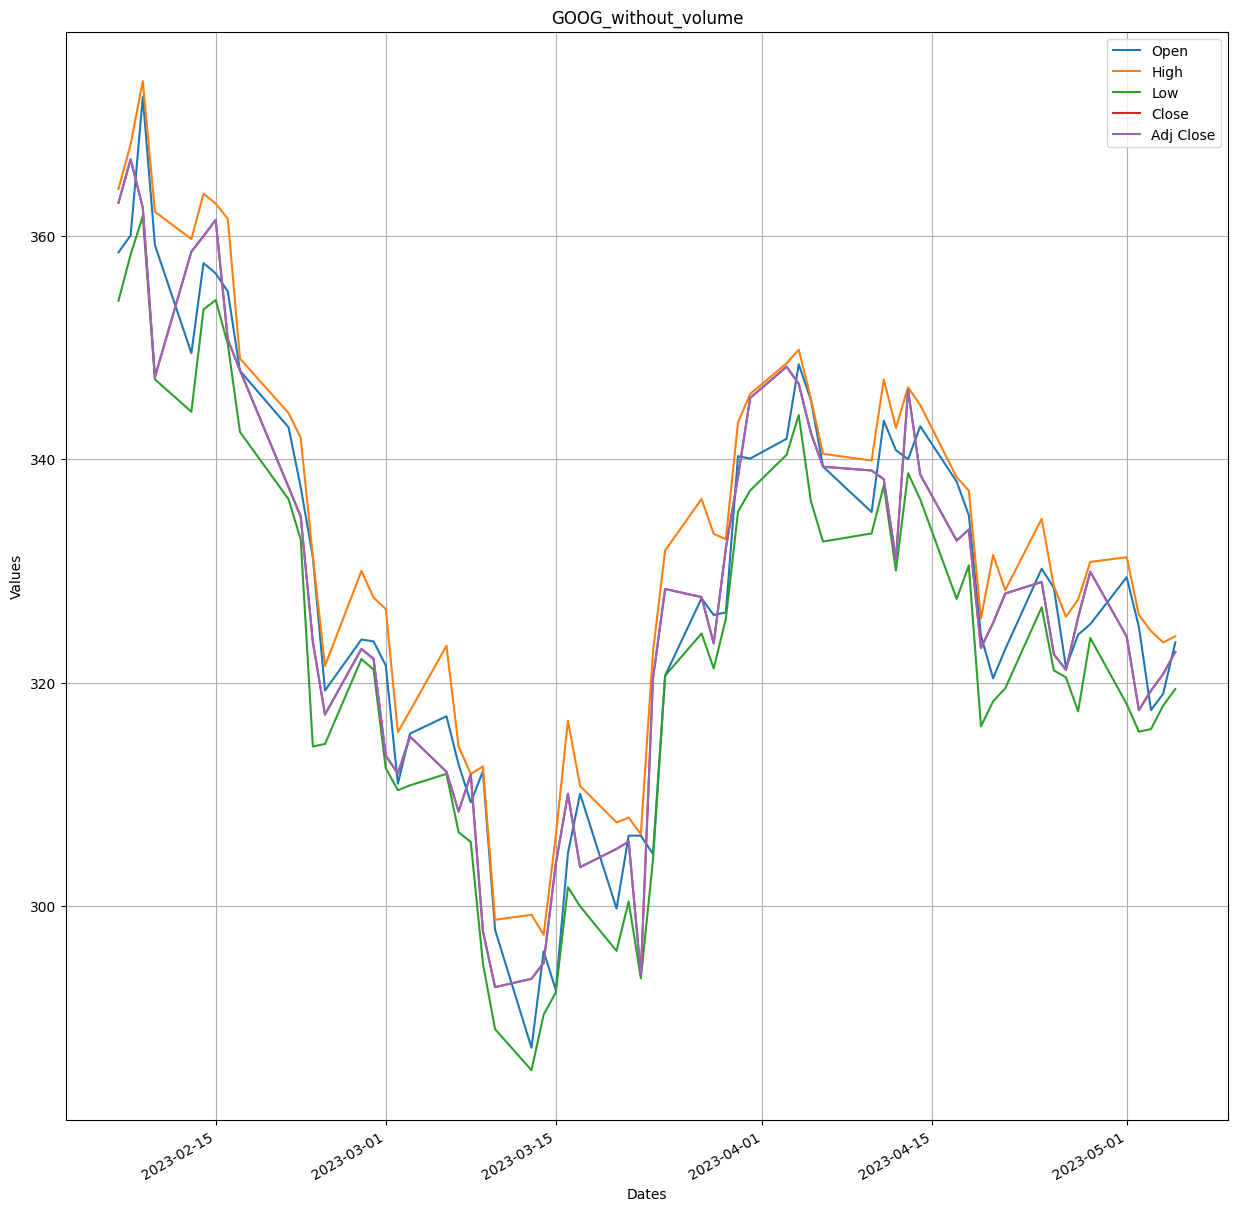

In [37]:
GOOG_without_volume.plot(figsize=(15, 16))
plt.xlabel('Dates')
plt.ylabel('Values')
plt.title('GOOG_without_volume')
plt.grid()

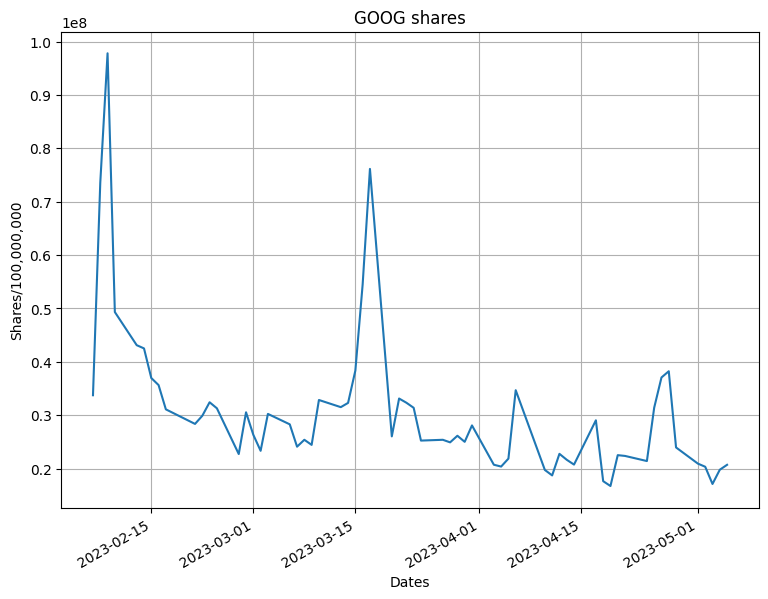

In [43]:
#Viewing the Volume column IN GOOG dataframe
GOOG['Volume'].plot()
plt.xlabel('Dates')
plt.ylabel('Shares/100,000,000')
plt.title('GOOG shares')
plt.grid()

<Axes: title={'center': 'GOOG Boxplot'}, ylabel='Price'>

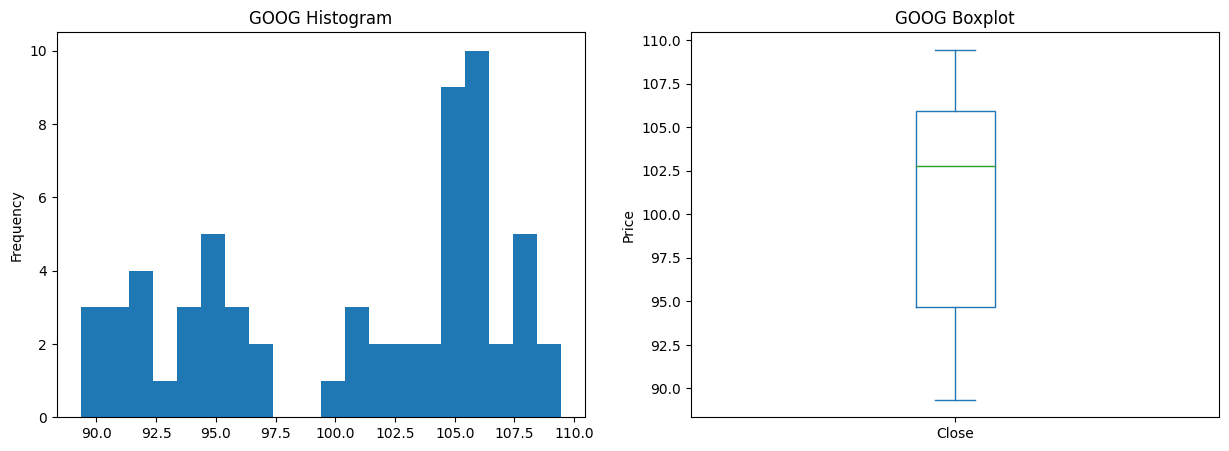

In [39]:
#showing the disribution of data through  histogram and a boxplot
fig, axs = plt.subplots(nrows =1 , ncols =2 , figsize = (15,5))

# GOOG Histogram
GOOG['Close'].plot(kind = 'hist', bins = 20, ax = axs[0], title = 'GOOG Histogram')

# GOOG Boxplot 
GOOG['Close'].plot(kind = 'box', ax = axs[1], title = 'GOOG Boxplot',ylabel = 'Price', vert = True)